In [8]:
#dependencies for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Production EDA

## Production Analysis
Do analysis 
- total count of:
    - strat/#unique skus
    - block/tons
    - shape/tons
    - size/tons
    - sku/tons
- check total number of years/months/cycles
- per year look at: 
    - by work_center, block, shape, size, sku

What to do with 30+ nulls in block/shape/size?

In [1]:
#Reading dataframe from cleaning.ipynb notebook
%store -r prod_reduced

In [2]:
#description of variables
prod_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14822 entries, 0 to 36155
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   calendar_day                    14822 non-null  datetime64[ns]
 1   production_process              14822 non-null  int64         
 2   production_process_description  14822 non-null  object        
 3   strategy                        14820 non-null  float64       
 4   work_center                     13452 non-null  object        
 5   wc_description                  14822 non-null  object        
 6   block                           14815 non-null  object        
 7   shape                           14795 non-null  object        
 8   size                            14795 non-null  object        
 9   sku                             14822 non-null  int64         
 10  material_description            14822 non-null  object        
 11  to

In [5]:
#What do we do with negative tons values in production? 
prod_reduced.loc[prod_reduced["ton"]<=0] #approx 2,220 are <=0 
#apparently most of these are materials that are being scraped

,calendar_day,production_process,production_process_description,strategy,work_center,wc_description,block,shape,size,sku,material_description,ton
830,2019-04-12,4310,Rolling,63.0,25000001,ROLLING - STRUCTURAL,"5"" ANG",SHAPE_L,5X5X1/2,106029555,"L 5X5X1/2 GGMULTI 60'00""",-6
1051,2018-11-09,4310,Rolling,63.0,25000001,ROLLING - STRUCTURAL,"5"" ANG",SHAPE_L,5X5X9/16,106019705,"L 5X5X9/16 55W 60'00""",-5
1070,2013-04-29,4310,Rolling,63.0,25000001,ROLLING - STRUCTURAL,"5 X 3"" ANG",SHAPE_L,5X3X1/4,106022690,"L 5X3X1/4 A36/44W/A529-50 20'00""",-3
1101,2016-10-06,4310,Rolling,63.0,25000001,ROLLING - STRUCTURAL,"7 X 4"" ANG",SHAPE_L,7X4X1/2,106020742,"L 7X4X1/2 44W 20'00""",0
1472,2016-07-13,4310,Rolling,63.0,25000001,ROLLING - STRUCTURAL,"6 X 4"" ANG",SHAPE_L,6X4X5/16,106020608,"L 6X4X5/16 MERSPC 40'00""",-12
...,...,...,...,...,...,...,...,...,...,...,...,...
35617,2017-01-26,4310,Rolling,40.0,NaN,1302/Not assigned,NaN,FLAT,1/4 X 5,109005365,"F 1/4X5 GGMULTI 20'00""",-2
35618,2017-02-27,4310,Rolling,40.0,NaN,1302/Not assigned,NaN,FLAT,5/16 X 8,109004173,"F 5/16X8 GGMULTI 20'00""",0
35631,2019-09-23,4310,Rolling,63.0,#,1302/Not assigned,NaN,SQUARE,130 X 130MM,102300129,"BL 130X130MM MANA-8431-502_1302 2,660 SA",-1
35632,2018-12-31,4310,Rolling,40.0,#,1302/Not assigned,NaN,SHAPE_L,2 1/2X2X5/16,106036737,"L 2 1/2X2X5/16 GGMULTI 40'00""",-1


In [3]:
# Count of Skus by strategy type
prod_reduced.groupby("strategy")["sku"].count().sort_values(ascending=False)

strategy
40.0    8566
63.0    6254
Name: sku, dtype: int64

In [6]:
# Aggregate Number of tons produced by Block
totprod_by_block = prod_reduced.groupby("block")["ton"].sum().sort_values(ascending=False)
totprod_by_block

block
15MM               410798
20MM               270351
25MM               215253
3" ANG             176473
4" ANG             134620
2" ANG             120222
35MM               109430
2-1/2" ANG         108152
30MM               100931
6" CHN              97219
4" CHN              95525
3" CHN              84647
8" CHN              76396
3-1/2" ANG          72818
6 X 4" ANG          58871
10" CHN             55258
5" ANG              52930
4 X 3" ANG          49569
6" ANG              48886
3 X 2" ANG          45943
5 X 3-1/2" ANG      45297
5" CHN              40515
6" FLT              39053
8" FLT              36537
6 X 3-1/2" ANG      27672
5 X 3" ANG          26315
7" CHN              22447
5" FLT              16589
3-1/2X2-1/2"ANG     12096
7" FLT              11382
7 X 4" ANG          10687
9" CHN              10504
10" FLT              2354
12" CHN              1790
MC3" CHN             1585
2-1/2 X 2" ANG       1379
3 X 2-1/2" ANG       1283
16M                   508
MC4" C

In [ ]:
#Create other categories anything less than 40K tons

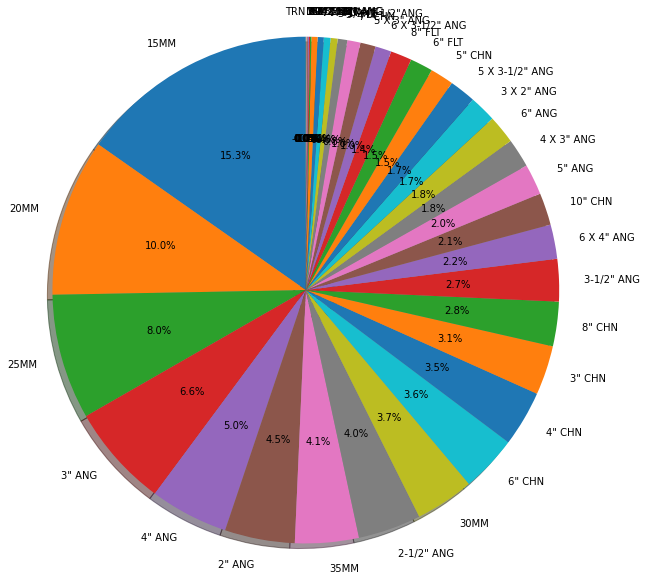

In [9]:
#PieChart by Block
fig_dims = (10,10)
fig, ax1 = plt.subplots(figsize=fig_dims)

ax1.pie(totprod_by_block, labels=totprod_by_block.index, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

#need to create "others" category to combine small blocks

In [10]:
# Aggregate Number of tons produced by Size
prod_reduced.groupby("size")["ton"].sum().sort_values(ascending=False)

size
15M             408496
20M             269050
25M             184577
35M             109430
30M              99698
                 ...  
130 X 130MM         -1
2 1/2X2X5/16        -1
8X8X3/4             -1
1/4 X 8             -2
1/4 X 5             -2
Name: ton, Length: 175, dtype: int64

In [4]:
# Aggregate Number of tons produced by SKU
prod_reduced.groupby("sku")["ton"].sum().sort_values(ascending=False)

sku
110001535    339802
110001860    186732
110001773    162121
110001621     71959
110001450     70786
              ...  
106020403        -9
106020373        -9
106020344       -16
110002040       -57
106021918       -69
Name: ton, Length: 1863, dtype: int64